In [1]:
!nvidia-smi

Tue Jun 14 17:33:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-06-14 17:33:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-14 17:33:07 (82.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



### Using pretrained models within keras.applications

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2022-06-14 17:33:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  40.8MB/s    in 3.9s    

2022-06-14 17:33:14 (40.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

training and test directory paths

In [5]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

test_data = image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [73]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images)
  print(labels)

## Using Functional API

#### Model 0: Build Feature Extraction Model

In [12]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top = False
)

16719872/16705208 [==============================] - 0s 0us/step


Set trainable to false

In [13]:
base_model.trainable = False

In [14]:
inputs = tf.keras.layers.Input(shape = IMG_SIZE + (3,), name = 'input_layer')

(Dont need to normalise for efficientnet models)

In [15]:
x = base_model(inputs)
x.shape

TensorShape([None, 7, 7, 1280])

In [16]:
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_pooling_layer')(x)

In [17]:
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

In [18]:
model_0 = tf.keras.Model(inputs, outputs)

In [19]:
model_0.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [20]:
history = model_0.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data))
)

Epoch 1/5
24/24 [==============================] - 23s 220ms/step - loss: 1.9073 - accuracy: 0.3973 - val_loss: 1.3289 - val_accuracy: 0.7253
Epoch 2/5
24/24 [==============================] - 4s 151ms/step - loss: 1.1498 - accuracy: 0.7333 - val_loss: 0.8988 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 4s 150ms/step - loss: 0.8325 - accuracy: 0.8027 - val_loss: 0.7286 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 4s 150ms/step - loss: 0.6928 - accuracy: 0.8427 - val_loss: 0.6457 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 4s 150ms/step - loss: 0.5948 - accuracy: 0.8720 - val_loss: 0.5689 - val_accuracy: 0.8586


In [21]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, ',', layer)

0 , <keras.engine.input_layer.InputLayer object at 0x7fa23074d810>
1 , <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fa228baac90>
2 , <keras.layers.preprocessing.normalization.Normalization object at 0x7fa228df0310>
3 , <keras.layers.convolutional.ZeroPadding2D object at 0x7fa228bcab10>
4 , <keras.layers.convolutional.Conv2D object at 0x7fa228d92190>
5 , <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa227f47990>
6 , <keras.layers.core.activation.Activation object at 0x7fa227f54810>
7 , <keras.layers.convolutional.DepthwiseConv2D object at 0x7fa227f54f90>
8 , <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa228daea90>
9 , <keras.layers.core.activation.Activation object at 0x7fa2291645d0>
10 , <keras.layers.pooling.GlobalAveragePooling2D object at 0x7fa227f3c1d0>
11 , <keras.layers.core.reshape.Reshape object at 0x7fa227f3c850>
12 , <keras.layers.convolutional.Conv2D object at 0x7fa227f38b90>
13 ,

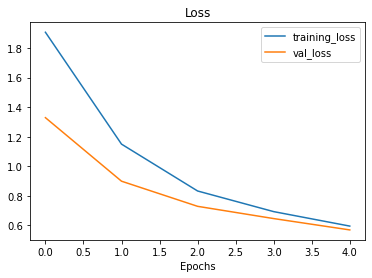

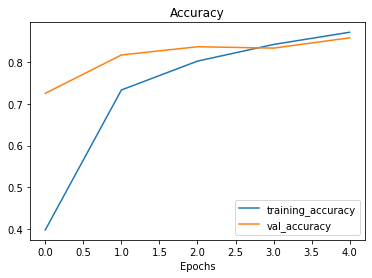

In [22]:
plot_loss_curves(history)

Demo global ervage pooling 2D.
Essentially turns 4d tensor in 2D.

In [23]:
input_shape = (1,4,4,3)
input_tensor = tf.random.normal(input_shape)

In [24]:
input_tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[-0.9979547 ,  0.08541168, -0.07163113],
         [ 2.3781724 ,  0.17854995, -0.373557  ],
         [ 0.30463946,  1.8136854 , -1.3635075 ],
         [ 1.0619164 ,  0.46511337,  0.88111144]],

        [[ 1.4961883 ,  0.17618513,  0.3180765 ],
         [ 1.7780262 ,  0.4689064 , -0.7486205 ],
         [-0.08967454,  0.43028438,  0.7144787 ],
         [-2.4397144 ,  0.1948398 , -0.73861736]],

        [[ 0.72096336,  0.19242273,  0.2104047 ],
         [ 0.01303977, -2.279195  , -0.5331322 ],
         [-1.4664314 , -2.0929804 ,  0.05639334],
         [-1.1132691 , -0.2191353 ,  0.65749186]],

        [[ 0.568776  ,  1.9402844 ,  0.6557216 ],
         [-0.17435616,  0.1835863 ,  0.04796772],
         [ 0.3328388 ,  1.9603792 ,  2.2986445 ],
         [-0.65444213, -0.51414263,  0.7247926 ]]]], dtype=float32)>

In [25]:
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_pooling_layer')(input_tensor)

In [26]:
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.10741989, 0.1865122 , 0.17100105]], dtype=float32)>

In [27]:
x.shape

TensorShape([1, 3])

In [28]:
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.10741989, 0.1865122 , 0.17100105]], dtype=float32)>

Global average pooling finds features and extracts them from vector space

## Run a Series of Models

#### Model with 1 pct Data

In [29]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-06-14 17:34:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  71.3MB/s    in 1.8s    

2022-06-14 17:34:15 (71.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [30]:
unzip_data('10_food_classes_1_percent.zip')

In [31]:
train_dir_1_pct = '10_food_classes_1_percent/train'
test_dir_1_pct = '10_food_classes_1_percent/test'

In [32]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [33]:
train_data_1_pct = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_pct,
    label_mode = 'categorical',
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)
test_data_1_pct = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_pct,
    label_mode = 'categorical',
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### Adding data augmentation into model

In [34]:
print(tf.__version__)

2.8.2


In [35]:
from tensorflow.keras.layers.experimental import preprocessing

In [36]:
data_augmentation = tf.keras.Sequential([
      preprocessing.RandomFlip('horizontal'),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2),
], name = 'data_augmentation')

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [38]:
target_class = random.choice(train_data_1_pct.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))

In [39]:
target_class

'grilled_salmon'

In [40]:
random_image_path = target_dir + '/' + random_image

In [41]:
img = mpimg.imread(random_image_path)

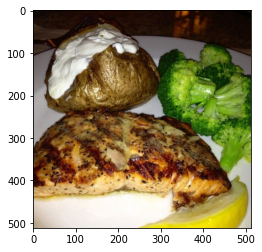

In [42]:
plt.imshow(img)

In [43]:
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))

In [44]:
augmented_img

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[ 20.,  12.,   9.],
         [ 21.,  13.,  10.],
         [ 22.,  14.,  11.],
         ...,
         [ 18.,   9.,   2.],
         [ 18.,   9.,   2.],
         [ 18.,   9.,   2.]],

        [[ 21.,  13.,  10.],
         [ 21.,  13.,  10.],
         [ 20.,  12.,   9.],
         ...,
         [ 19.,  10.,   5.],
         [ 17.,   8.,   3.],
         [ 17.,   8.,   1.]],

        [[ 22.,  14.,  11.],
         [ 22.,  14.,  11.],
         [ 20.,  12.,   9.],
         ...,
         [ 22.,  13.,   8.],
         [ 19.,  10.,   5.],
         [ 18.,   9.,   4.]],

        ...,

        [[185., 168., 148.],
         [184., 167., 147.],
         [182., 165., 145.],
         ...,
         [196., 190., 174.],
         [195., 189., 173.],
         [194., 188., 172.]],

        [[187., 170., 152.],
         [187., 170., 152.],
         [186., 169., 149.],
         ...,
         [198., 191., 175.],
         [197., 190., 174.],
         

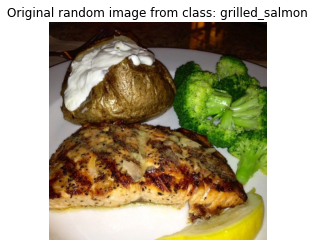

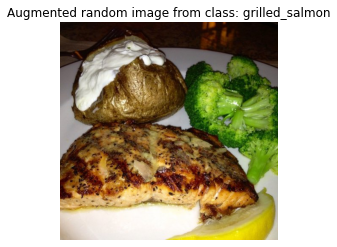

In [45]:
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [46]:
IMG_SIZE

(224, 224)

In [47]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [48]:
inputs = tf.keras.layers.Input(shape=(IMG_SIZE) + (3,), name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

In [49]:
model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = 'accuracy'
)

In [50]:
model_1.fit(
    train_data_1_pct,
    epochs = 5,
    validation_data = test_data,
    validation_steps=int(0.25* len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")]
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220614-173420
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.3762 - accuracy: 0.0857 - val_loss: 2.2729 - val_accuracy: 0.1266
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1701 - accuracy: 0.2429 - val_loss: 2.1737 - val_accuracy: 0.2072
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9559 - accuracy: 0.4429 - val_loss: 2.0533 - val_accuracy: 0.3026
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8494 - accuracy: 0.4429 - val_loss: 1.9529 - val_accuracy: 0.3569
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6544 - accuracy: 0.5857 - val_loss: 1.8882 - val_accuracy: 0.3849


#### Model with 10% data

In [51]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2022-06-14 17:34:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   287MB/s    in 0.6s    

2022-06-14 17:34:53 (287 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [52]:
train_data_10pct = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode = 'categorical',
    image_size = IMG_SIZE
)
test_data_10pct = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    image_size = IMG_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [53]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [54]:
inputs = tf.keras.layers.Input(shape=IMG_SIZE + (3,), name="input_layer") # create input layer
x = data_augmentation(inputs, training=True) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

batch norm layers should have frizen at all times so statistics arent updated (should be kept in inference mode, use trainable = False)

In [ ]:
base_model.summary()

In [56]:
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [57]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

Train Model

In [58]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10pct,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220614-173458
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0208 - accuracy: 0.3333
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 690ms/step - loss: 2.0208 - accuracy: 0.3333 - val_loss: 1.5648 - val_accuracy: 0.6184
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3744 - accuracy: 0.6467
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 477ms/step - loss: 1.3744 - accuracy: 0.6467 - val_loss: 1.1640 - val_accuracy: 0.7188
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0789 - accuracy: 0.7347
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 461ms/step - loss: 1.0789 - accuracy: 0.7347 - val_loss: 0.9641 - val_accuracy: 0.7533
E

In [59]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 19s 229ms/step - loss: 0.8430 - accuracy: 0.7632


[0.8430325388908386, 0.7631999850273132]

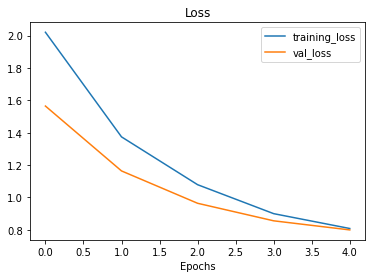

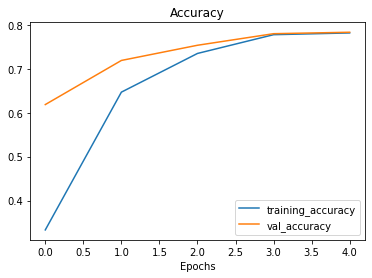

In [60]:
plot_loss_curves(history_10_percent_data_aug)

Load Model from checkpoints

In [61]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 17s 205ms/step - loss: 0.8451 - accuracy: 0.7616


In [62]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([False, False])

In [63]:
base_model.trainable = True # set all layers to trainabkle to begin fine-tuning

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False



In [64]:
inputs = tf.keras.layers.Input(shape=IMG_SIZE + (3,), name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [65]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [66]:
print(len(model_2.trainable_variables))

12


In [67]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [68]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [71]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10pct,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1], # start from last epoch
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", experiment_name = "fine_tune_10_pct")])

Saving TensorBoard log files to: transfer_learning/fine_tune_10_pct/20220614-175134
Epoch 5/10
24/24 [==============================] - 18s 417ms/step - loss: 2.1537 - accuracy: 0.2680 - val_loss: 1.7793 - val_accuracy: 0.5247
Epoch 6/10
24/24 [==============================] - 9s 333ms/step - loss: 1.5740 - accuracy: 0.5920 - val_loss: 1.2209 - val_accuracy: 0.6941
Epoch 7/10
24/24 [==============================] - 9s 344ms/step - loss: 1.1363 - accuracy: 0.6867 - val_loss: 0.8602 - val_accuracy: 0.7681
Epoch 8/10
24/24 [==============================] - 8s 316ms/step - loss: 0.8913 - accuracy: 0.7533 - val_loss: 0.6797 - val_accuracy: 0.8043
Epoch 9/10
24/24 [==============================] - 8s 318ms/step - loss: 0.7245 - accuracy: 0.7893 - val_loss: 0.6002 - val_accuracy: 0.8174
Epoch 10/10
24/24 [==============================] - 7s 265ms/step - loss: 0.6400 - accuracy: 0.8120 - val_loss: 0.5841 - val_accuracy: 0.8059


#### Model 4: Fine tuning on all the data

In [72]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-14 17:56:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  49.7MB/s    in 11s     

2022-06-14 17:56:24 (44.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [75]:
unzip_data("10_food_classes_all_data.zip")

In [80]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [81]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [82]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

test_data = image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [83]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [85]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "all_data_model")])

Saving TensorBoard log files to: transfer_learning/all_data_model/20220614-181330
Epoch 5/10
235/235 [==============================] - 55s 207ms/step - loss: 0.7261 - accuracy: 0.7704 - val_loss: 0.4431 - val_accuracy: 0.8569
Epoch 6/10
235/235 [==============================] - 46s 194ms/step - loss: 0.6069 - accuracy: 0.8051 - val_loss: 0.4176 - val_accuracy: 0.8602
Epoch 7/10
235/235 [==============================] - 46s 194ms/step - loss: 0.5415 - accuracy: 0.8281 - val_loss: 0.3899 - val_accuracy: 0.8783
Epoch 8/10
235/235 [==============================] - 37s 157ms/step - loss: 0.4945 - accuracy: 0.8432 - val_loss: 0.3798 - val_accuracy: 0.8717
Epoch 9/10
235/235 [==============================] - 38s 159ms/step - loss: 0.4581 - accuracy: 0.8564 - val_loss: 0.3900 - val_accuracy: 0.8635
Epoch 10/10
235/235 [==============================] - 36s 150ms/step - loss: 0.4327 - accuracy: 0.8628 - val_loss: 0.3647 - val_accuracy: 0.8849


In [86]:
!nvidia-smi

Tue Jun 14 18:19:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    31W /  70W |   4884MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [87]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.3119 - accuracy: 0.9044


[0.31190478801727295, 0.9043999910354614]